# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
dados = pd.read_csv("https://raw.githubusercontent.com/luislauriano/AceleraDev_DataScience/master/data/athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
dados.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [14]:
dados.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [9]:
dados.nunique()

id             11538
name           11517
nationality      207
sex                2
dob             5595
height            82
weight           123
sport             28
gold               6
silver             3
bronze             3
dtype: int64

In [17]:
dados['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [26]:
 # Amostra:
sample = get_sample(dados,'height', n=3000)

def q1():
    # Retorne aqui o resultado da questão 1.

    # Teste de normalidade:
    stat, p = sct.shapiro(sample)
    print(f'statistics:{stat}, p-value:{p}')

    # Interpretação:
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False
    
q1()

statistics:0.9961519837379456, p-value:5.681722541339695e-07


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

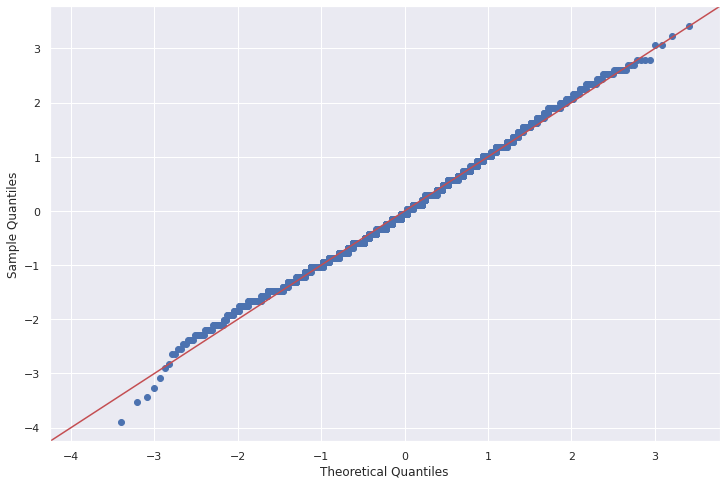

In [32]:
import statsmodels.api as sm
# QQ-plot:
sm.qqplot(sample, fit=True, line="45");

No qq-plot podemos observar que a grande maioria dos dados (pontos azuis) está em cima da linha vermelha (linha de 45°), isso significa que nosso dados são normalmente distribuídos.

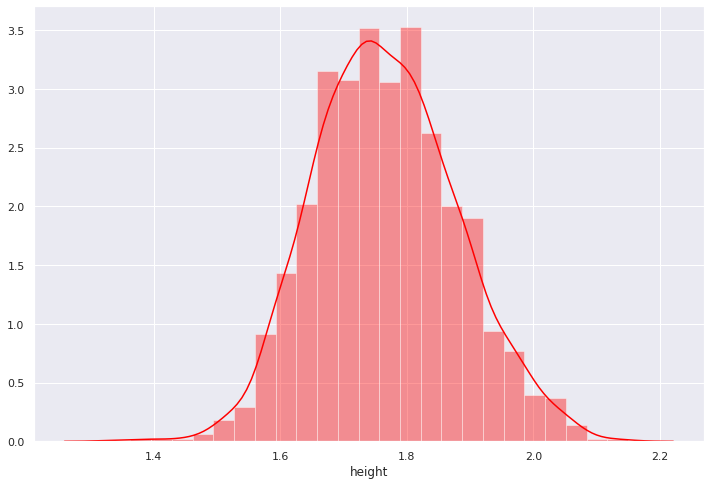

In [34]:
#histograma
sns.distplot(sample, bins=25, color='red');

**Conclusão** 

Apesar do qq-plot e do histograma nos dizerem que os dados são normalmente distribuidos. O teste de SW diz que os dados não são normalmente distruibuidos. Isso significa que é possivel de p-value ser maior que alpha. 

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [51]:
 #Amostra
amostra = get_sample(dados, 'height', n=3000)

def q2():
    # Teste de normalidade(aderencia):
    stat, p = sct.jarque_bera(amostra)
    print(f'statistics:{stat}, p-value:{p}')

    # Interpretação:
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False
q2()

statistics:13.03363513594265, p-value:0.001478366424594868


False

__Para refletir__:

* Esse resultado faz sentido?

Assim como no teste de Shapiro-Wilk o teste de Jarque-Bera apresenta um p-valor menor que alpha, ou seja, mostrando que há evidências de que a amostra não se trata de uma distruibição normal.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [52]:
#Amostra da coluna Wight
nova_amostra = get_sample(dados, 'weight', n= 3000)
def q3():

  # Teste de normalidade:
    stat,p = sct.normaltest(nova_amostra)
    print(f'statistics:{stat}, p-value:{p}')

    # Interpretação:
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False
q3()


statistics:510.24655809881176, p-value:1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

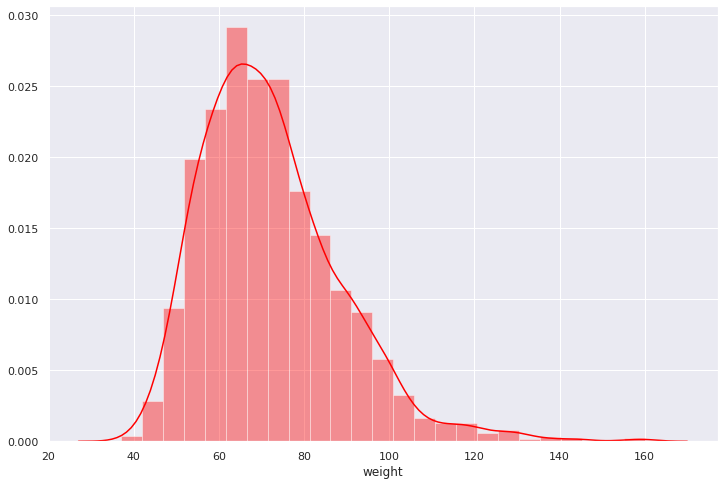

In [53]:
sns.distplot(nova_amostra, bins=25, color='red')


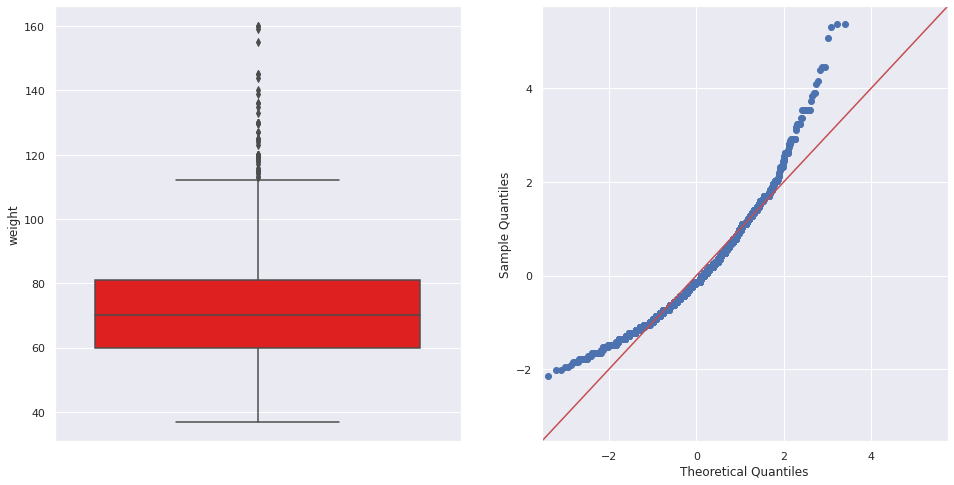

In [55]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Box plot:
sns.boxplot(nova_amostra,orient='v', color='red', ax=axs[0])

# QQ-plot:
sm.qqplot(nova_amostra, fit=True, line="45", ax=axs[1]);

Agora claramente podemos afirmar que a amostra não é distribuida normalmente, além do p-valor ser menor que o alpha. Diferente dos dois outros testes, nesse o qq-plot se mostrou de forma que a linha está distorcida, ou seja, quando uma distribuição é normalmente distribuída, você verá uma linha reta. Quanto mais distorcida a linha, mais distante a distribuição se afasta da normalidade.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [56]:
#Transformação Logaritmica 
nova_amostra_log = np.log(nova_amostra)
def q4():
  # Novo teste de D'Agostino-Pearson:
    stat,p = sct.normaltest(nova_amostra_log)
    print(f'statistics:{stat}, p-value:{p}')

    # Interpretação:
    alpha = 0.05
    if p > alpha:
        return True
    else:
        return False
q4()


statistics:45.91534331977353, p-value:1.0705572101256944e-10


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

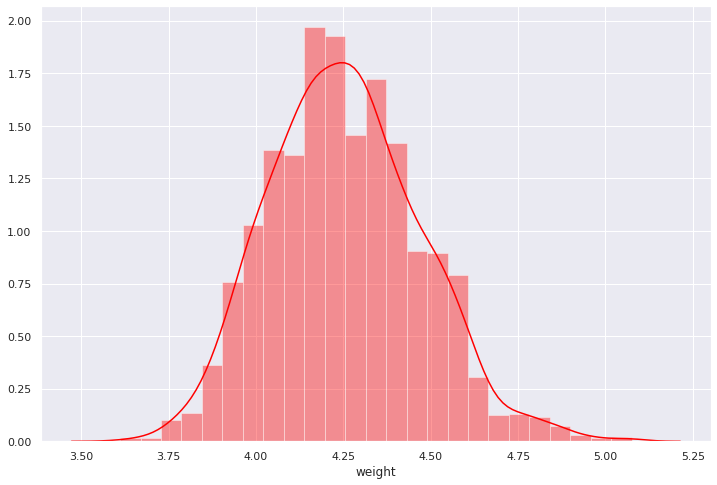

In [58]:
#Novo histograma
sns.distplot(nova_amostra_log, bins=25, color='red')

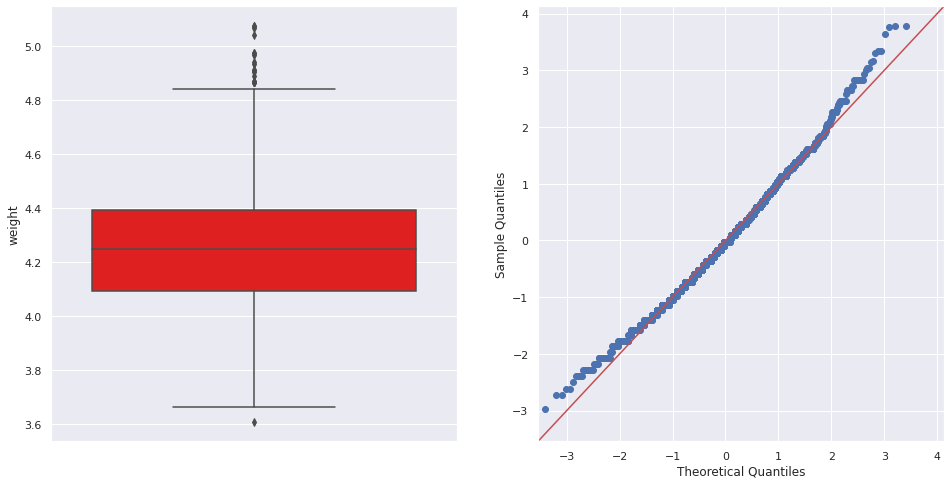

In [59]:
fig, axs = plt.subplots(ncols=2, figsize=(16,8))

# Novo Box plot:
sns.boxplot(nova_amostra_log,orient='v', color='red', ax=axs[0])

# Novo QQ-plot:
sm.qqplot(nova_amostra_log, fit=True, line="45", ax=axs[1]);

Agora é possivel observar que os dados após a transformação logaritmica se aproximam mais de uma distribuição normal. Isso pode ser notado se observarmos que o p-valor aumentou e o qq-plot apresenta mais pontos azuis no centro.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [65]:
# Criando os dataframes:
bra = dados[dados['nationality'] == "BRA"]
usa = dados[dados['nationality'] == "USA"]
can = dados[dados['nationality'] == "CAN"]

def q5():
    # Média das alturas de 'BRA' e 'USA':
    print(f'Média Brasil: {bra["height"].mean()}')
    print(f'Média EUA: {usa["height"].mean()}')
    
    # Teste de hipótese das amostras:
    bra_usa = sct.ttest_ind(bra['height'], usa['height'], equal_var=False, nan_policy='omit')

    # Verificando se as médias são estatisticamente iguais:
    alpha = 0.05
    if bra_usa[1] > alpha:
        return True
    else:
        return False
q5()

Média Brasil: 1.764033613445379
Média EUA: 1.7877678571428557


False

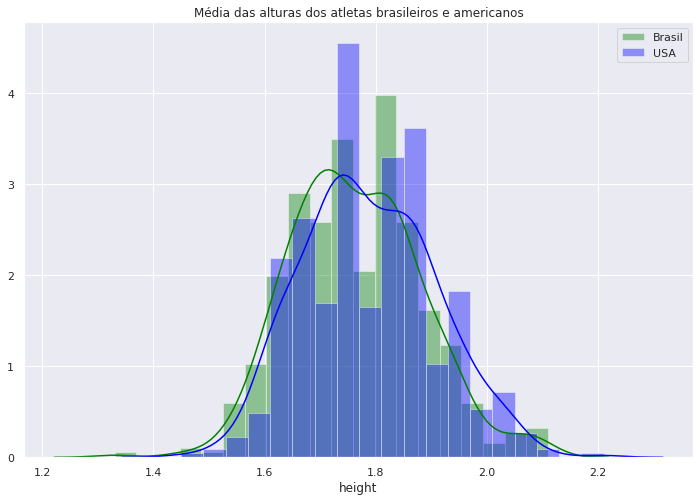

In [67]:
sns.distplot(bra['height'].dropna(), label='Brasil', color='green')
sns.distplot(usa['height'].dropna(), label='USA', color ='blue')
plt.title('Média das alturas dos atletas brasileiros e americanos')
plt.legend();

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [68]:
def q6():
    # Média das alturas de 'BRA' e 'CAN':
    print(f'BRA: {bra.height.mean()}\nCAN: {can.height.mean()}')
    
    # Teste de hipótese das amostras:
    bra_can = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit')

    # Verificando se as médias são estatisticamente iguais:
    alpha = 0.05
    if bra_can[1] > alpha:
        return True
    else:
        return False
q6()

BRA: 1.764033613445379
CAN: 1.7585937500000004


True

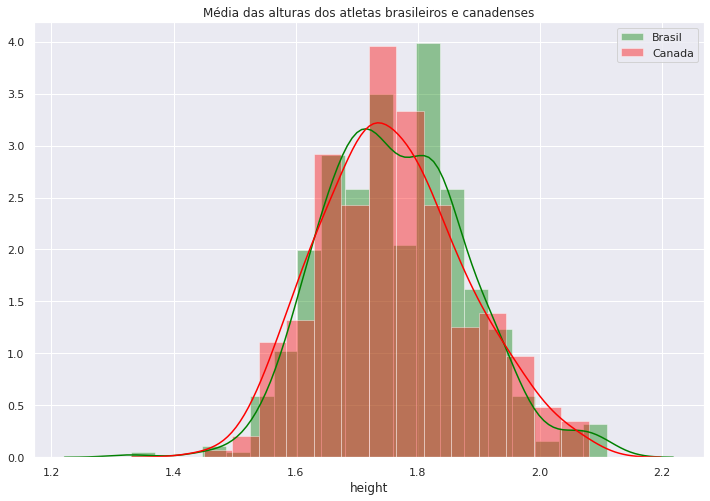

In [69]:

sns.distplot(bra.height.dropna(), label='Brasil', color='green')
sns.distplot(can.height.dropna(), label='Canada', color ='red')
plt.title('Média das alturas dos atletas brasileiros e canadenses')
plt.legend();

De acordo com os resultados, estaticamente bra e can tem medias de alturas iguais.

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [72]:
def q7():
    # Média das alturas de 'USA' e 'CAN':
    print(f'USA: {usa.height.mean()}\nCAN: {can.height.mean()}')
    
    # Teste de hipótese das amostras:
    usa_can = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit')

    # Valor de p-value:
    return float(round(usa_can[1],8))
q7()

USA: 1.7877678571428557
CAN: 1.7585937500000004


0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

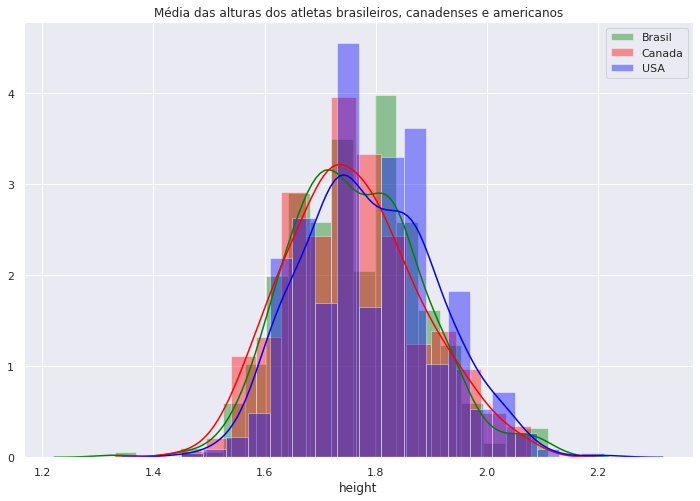

In [73]:

sns.distplot(bra.height.dropna(), label='Brasil', color='green')
sns.distplot(can.height.dropna(), label='Canada', color ='red')
sns.distplot(usa.height.dropna(), label='USA', color ='blue')
plt.title('Média das alturas dos atletas brasileiros, canadenses e americanos')
plt.legend();